Energy of 3D Hydrogen Atom in atomic units:
\begin{equation}
E_n = -\frac{E_{a.u.}}{2} \frac{1}{n^2}
\end{equation}
Energy of 2D Hydrogen Atom in atomic units
\begin{equation}
E_n = -\frac{E_{a.u.}}{2(n- \frac{1}{2})^2}
\end{equation}

Reminder of atomic units:
\begin{align}
m_e = 1 a.u. \: (mass) \\
e = 1 a.u. \: (charge) \\
\frac{1}{4\pi \epsilon_0} =  1 a.u. \: (permittivity^{-1}) \\
\frac{4\pi \epsilon_0 \hbar^2}{m_e e^2} = 1 a.u. \: (length) \\
\frac{m_e e^4}{\left(4\pi \epsilon_0\right)^2 \hbar^2} = 1 a.u. \: (energy)
\end{align}

Natural Units for Excitonic System and their relation to SI units:
\begin{align}
m_h \: (mass) \rightarrow 1 a.u. = \frac{m_h}{m_e} \cdot 9.1093 \cdot 10^{-31} \: kg \\
\frac{1}{4\pi \epsilon_{m} \epsilon_0} \: (permittivity^{-1}) \rightarrow  1 a.u. = \frac{1}{\epsilon_m}8.987 \cdot 10^9 m^3 \: kg \: s^{-4} \: A^{-2}  \\
e \: (charge) \rightarrow 1 a.u. = 1.6021 \cdot 10^{-19} C \\
\hbar \: (action) \rightarrow 1 a.u. = 1.0545 \cdot 10^{-34} m^2 \: kg \: s^{-1}
\end{align}

Taken together, the energy in natural units for the excitonic system
is 
\begin{equation}
E_{Nat.} = \frac{m_h}{m_e \epsilon_m^2 } \cdot E_{a.u.}
\end{equation}
where $E_{a.u.}$ is 1 Hartree.  

###The binding energy for the 2D excitonic system is 
\begin{equation}
E_{binding} = 2 E_{Nat} = 2 \cdot \frac{m_h}{m_e \epsilon_m^2} \cdot E_{a.u.}
\end{equation}
Assuming the binding energy has been measured in electron volts, we can re-arrange for the effective dielectric function of the nanoplatlet:
\begin{equation}
\epsilon_m = \sqrt{\frac{2 m_h}{m_e} \cdot \frac{27.211 eV}{E_{binding}}}
\end{equation}

###The binding energy for the 3D excitonic system is 
\begin{equation}
E_{binding} = \frac{1}{2} E_{Nat} =  \frac{m_h}{2m_e \epsilon_m^2} \cdot E_{a.u.}
\end{equation}
Assuming the binding energy has been measured in electron volts, we can re-arrange for the effective dielectric function of the nanoplatlet:
\begin{equation}
\epsilon_m = \sqrt{\frac{m_h}{2m_e} \cdot \frac{27.211 eV}{E_{binding}}}
\end{equation}




In [11]:
import numpy as np
import scipy.special as sc
import math

In [12]:
### E_n for the 2D excitonic system
def En_2D_using_mu(n, redmass, epsilon_m):
    return -1*redmass / (2 * epsilon_m**2 * (n - 0.5 )**2 )

mu = 0.22
eps_m = 10.

print("Binding energy of 2D Hydrogen:", -27.211 * 1000 *En_2D_using_mu(1, mu, eps_m))

Binding energy of 2D Hydrogen: 119.72840000000001


In [13]:
def effective_eps(E_bind, mass_hole):
    eps_eff_2d = np.sqrt(2*mass_hole/9.310938e-31 * 27.211/E_bind)
    eps_eff_3d = np.sqrt(mass_hole/(2*9.310938e-31) * 27.211/E_bind)
    return eps_eff_2d, eps_eff_3d

print(" Enter Binding Energy in eV")
Ebin = float(input())

print(" Enter the hole mass in kilograms")
m_h = float(input())

eps_2d, eps_3d = effective_eps(Ebin, m_h)
print("Effective Epsilon for 2D system is ",eps_2d)
print("Effective Epsilon for 3D system is ", eps_3d)


 Enter Binding Energy in eV
.417
 Enter the hole mass in kilograms
0.22*9e-31


ValueError: could not convert string to float: '0.22*9e-31'

The 2D Hydrogen atom energy eigenfunctions can be written as follows [1](https://www.researchgate.net/publication/13384275_Analytic_solution_of_a_two-dimensional_hydrogen_atom_I_Nonrelativistic_theory)
\begin{equation}
\psi_{n,l,m_l}(r,\phi) = R_{n,l}(r) \Phi_{l,m_l}(\phi),
\end{equation}
where 
\begin{equation}
\Phi_{l,m_l}(\phi) = e^{i m_l \phi},
\end{equation}
and 
\begin{equation}
R_{n,l} = \\ \frac{\beta_n}{(2|l|)!}\left(\frac{(n + |l| - 1)!}{(2n-1)(n-|l|-1)!}\right)^{1/2} \left( \beta_n r \right)^{|l|} \: _1 F_1(-n + |l| + 1, 2|l| + 1, \beta_n r)
\end{equation}
where 
\begin{equation}
\beta_n = \frac{2}{n-1/2} \frac{\mu e^2}{\hbar^2}
\end{equation}
and $_1F_1(a, b, c)$ denotes the confluent hypergeometric function.  We will define python functions to compute $\psi_{n,l,m_l}$, assuming atomic units throughout!

In [ ]:
def beta_n(n, mu):
  ''' Compute beta term for a given value
      of principle quantum number n and the reduced mass mu '''
  return mu * 2/(n-0.5)

def chf_args(n, l, mu, r):
  ''' Compute the arguments to be passed to the confluent hypergeometric
      function (_1F_1(a, b, c)) given the principle quantum number n, 
      angular momentum qn l, reduced mass mu, and radial coordinate value r '''
  bn = beta_n(n, mu)
  a = -n + np.abs(l) + 1
  b = 2 * np.abs(l) + 1
  c = bn * r
  ### return arguments in a list
  return [a, b, c]

def phi_lm(ml, phi):
  ''' Compute the angular part of the energy eigenfunction for a given
      value of the z-component of angular momentum qn ml and angular
      coordinate value phi '''
  ci = 0+1j
  return np.exp(ci * ml * phi)

def norm(n, l, mu):
  ''' compute the normalization constant given the value of reduced mass mu, 
      principle quantum number n, angular momentum quantum number l '''
  bn = beta_n(n, mu)
  t1 = bn/math.factorial(2*np.abs(l))
  t2 = np.sqrt( math.factorial(n + np.abs(l) - 1)/((2*n-1)*math.factorial(n - np.abs(l) - 1) ))
  return t1 * t2

def R_nl(n, l, mu, r):
  ''' Compute radial part given the quantum numbers n and l, 
      reduced mass mu, and radial coordinate r '''
  ### normalization
  N = norm(n, l, mu)
  ### args for confluent hypergeometric function
  arg = arg = chf_args(n, l, mu, r)
  ### confluent hypergeometric function contribution
  fr = sc.hyp1f1(arg[0], arg[1], arg[2])
  ### beta term
  bn = beta_n(n, mu)
  ### now the whole thing!
  return N * fr * np.power(bn*r, np.abs(l)) * np.exp(-bn * r / 2)


def psi_nlm(mu, n, l, ml, r, phi):
  ''' Computes the 2D hydrogen energy eigenfunctions
      for a given reduced mass, quantum numbers n, l, and ml, 
      and value of the coordinates r and phi '''
  ### angular part
  phi = phi_lm(ml, phi)
  ### radial part
  Rnl = R_nl(n, l, mu, r)
  ### the whole thing!
  return phi * Rnl

def E_n(n):
  return -1/(2*(n-0.5)**2)

Let's plot some eigenfunctions and see how they compare to the explicit functions given from table 2.17 of Ref.[1](https://www.researchgate.net/publication/13384275_Analytic_solution_of_a_two-dimensional_hydrogen_atom_I_Nonrelativistic_theory)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


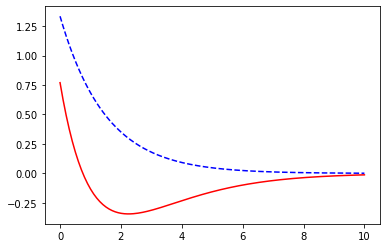

In [ ]:
from matplotlib import pyplot as plt
### make a grid of r values
r = np.linspace(0,10,200)

### hard-code l, ml, mu, and phi
lval = 0
mlval = 0
mu = 1
phi = 0

### try 1s:
## our function first
psi_1s = psi_nlm(mu, 2, lval, mlval, r, phi)
## explicit expression from Ref. 1
psi_1_r1 = beta_n(2, mu) * np.exp( - beta_n(2, mu) * r / 2)

plt.plot(r, psi_1s, 'red')
plt.plot(r, psi_1_r1, 'b--')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


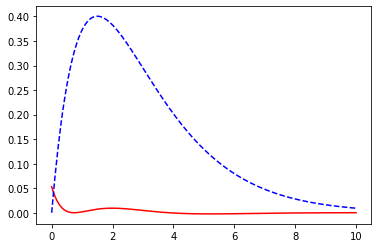

In [ ]:
### try 2p:
## our function first
psi_2s = psi_nlm(mu, 8, 0, 0, r, phi)
## explicit expression from Ref. 1
psi_2p_r1 = beta_n(2,mu)**2 / np.sqrt(6) * r * np.exp(-beta_n(2, mu) * r / 2)

plt.plot(r, psi_1s*psi_2s, 'red')
plt.plot(r, psi_2p_r1, 'b--')
plt.show()

We can define the first-order correction to the ground-state wavefunction as
\begin{equation}
\psi_{1,0,0}^1 = \sum_{n\neq1, l, m_l} \frac{\langle \psi_{n,l,m_l}^0 | \hat{H}' | \psi_{1,0,0}^0 \rangle}{E_{1,0,0}^0 - E_{n,l,m_l}^0} \psi_{n,l,m_l}^0,
\end{equation}
where $\psi_m^0$ are the ordinary 2D hydrogen energy eigenstates, $E_m^0$ are the ordinary 2D hydrogen energy eigenvalues, and $\hat{H}'$ is the perturbation to the 2D hydrogen potential due to the effective dielectric function.
We can write this perturbation as
\begin{equation}
\hat{H}' = \hat{V}_{eff} - \hat{V}_0
\end{equation}
where 
\begin{equation}
\hat{V}_{eff} = -\frac{1}{\epsilon_{eff} r}
\end{equation}
and
\begin{equation}
\hat{V}_0 = -\frac{1}{r}
\end{equation}
so that we can define the perturbation as
\begin{equation}
\hat{H}' = \frac{\epsilon_{eff}-1}{\epsilon_{eff} \: r}.
\end{equation}
Because the perturbation only involves the radial coordinate, the integrals in the perturbative expansion can be factored into radial and angular components:
\begin{equation}
\psi_{1,0,0}^1 = \sum_{n\neq1,l,m_l} \frac{\langle R_{n,l} | \hat{H}' | R_{1,0} \rangle}{E_{n,l,m_l}^0 - E_{1,0,0}^0} \langle \Phi_{l,m_l}| \Phi_{0,0} \rangle \psi_{n,l,m_l}^0,
\end{equation}
and because of the orthogonality of the angular components, this simplifies to
\begin{equation}
\psi_{1,0,0}^1 = 2\pi \sum_{n\neq1} \frac{\langle R_{n,0} | \hat{H}' | R_{1,0} \rangle}{E_{n,0,0}^0 - E_{1,0,0}^0} \psi_{n,0,0}^0.
\end{equation}

In [ ]:
### Need to figure out how we are going to store the 2D wavefunctions!
def bra_hp_ket(r, psi_a, psi_b, eps_eff):
  ''' computes the <psi_a | H' | psi_b> terms for perturbation theory
      where H' = V_c,eps_eff - V_c,eps_0 where 
      V_c,eps_0 denotes the coulomb potential in a vacuum and
      V_c,eps_eff denotes the screened coulomb potential.  Integration is done
      using rectangle rule for now... maybe good to do Gauss-Legendre or something fancier... '''
  # differential elements
  # dr
  dr = r[1] - r[0]
  ### the perturbation array!
  Hp =  (eps_eff - 1)/eps_eff
  ### Hp on ket
  Hp_ket = Hp * psi_b
  ### bra on Hp * ket
  b_hp_k = np.conj(psi_a) * Hp_ket
  ### now integrate!
  som = 0.
  for i in range(0,len(r)):
    if (b_hp_k[i] * dr == b_hp_k[i] * dr):
      som = som + b_hp_k[i] * dr
  
  ### return the integral <R | H' | R><Phi|Phi>
  return np.real(som) 


bra = psi_nlm(mu, 13, 0, 0, r, phi)
bra_hp_ket(r, psi_1s, bra, 1.2)
  

0.0041962187919753775

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


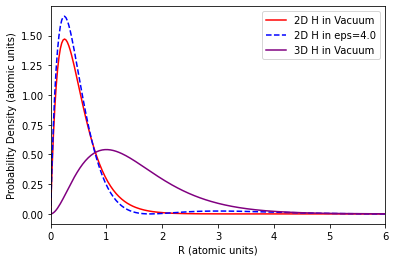

In [ ]:
''' Do the perturbative expansion!'''
E_1 = E_n(1)
psi_pt1 = psi_1s
for i in range(2,100):
  bra = psi_nlm(mu, i, 0, 0, r, phi)
  matrix = bra_hp_ket(r, psi_1s, bra, 4.0)
  E_i = E_n(i)
  coeff = matrix/(E_i - E_1)
  psi_pt1 = psi_pt1 + coeff * bra

### for comparison, compute the 3D hydrogen 1s wf
psi_1s_3d = 2*np.exp(-r)

### Compute probability densities
p_of_r_3d = psi_1s_3d * psi_1s_3d * r * r 
p_of_r_2d = psi_1s * psi_1s * r 
p_of_r_2d_pt = psi_pt1 * psi_pt1 * r 



plt.plot(r, p_of_r_2d, 'red', label='2D H in Vacuum')
plt.plot(r, p_of_r_2d_pt, 'b--', label='2D H in eps=4.0')
plt.plot(r, p_of_r_3d, 'purple', label='3D H in Vacuum')
plt.xlim(0,6)
plt.xlabel("R (atomic units)")
plt.ylabel("Probability Density (atomic units)")
plt.legend()
plt.show()



In [ ]:
''' Compute the <r> expectation values for the perturbed wf and the psi_1,0,0
    state of 2d and 3d hydrogen'''
r_exp_3d = 0
r_exp_1 = 0
r_exp_2 = 0

#plt.plot(r, p_of_r_2d, 'red')
#plt.plot(r, p_of_r_2d_pt, 'b--')
#plt.plot(r, p_of_r_3d, 'purple')
#plt.xlim(0,2)
dr = r[1]-r[0]
for i in range(0,len(r)):
  if p_of_r_3d[i] == p_of_r_3d[i]:
    r_exp_3d = r_exp_3d + p_of_r_3d[i] * r[i] * dr
  if p_of_r_2d_pt[i]==p_of_r_2d_pt[i]:
    r_exp_1 = r_exp_1 + p_of_r_2d_pt[i] * r[i] * dr
  if p_of_r_2d[i]==p_of_r_2d[i]:
    r_exp_2 = r_exp_2 + p_of_r_2d[i] * r[i] * dr

print("<r> for 3D 1s orbital",r_exp_3d)
print("<r> for 2D 1s orbital in medium", r_exp_1)
print("<r> for 2D 1s orbital in vacuum", r_exp_2)


<r> for 3D 1s orbital 1.5000000130156865
<r> for 2D 1s orbital in medium (0.734323494247856+0j)
<r> for 2D 1s orbital in vacuum (0.4999997917903022+0j)


1.0 (0.4999997917903022+0j)
1.1578947368421053 (0.48994099554712894+0j)
1.3157894736842106 (0.49603886862461616+0j)
1.4736842105263157 (0.5091562219043677+0j)
1.631578947368421 (0.5250717971828569+0j)
1.7894736842105263 (0.5417567908732657+0j)
1.9473684210526314 (0.5582242786291627+0j)
2.1052631578947367 (0.5740053491713849+0j)
2.263157894736842 (0.5888963839600702+0j)
2.4210526315789473 (0.6028315705327011+0j)
2.5789473684210527 (0.6158163792541768+0j)
2.7368421052631575 (0.6278920059054827+0j)
2.894736842105263 (0.6391160910362459+0j)
3.052631578947368 (0.6495522297377834+0j)
3.2105263157894735 (0.6592643268820895+0j)
3.3684210526315788 (0.6683136606092935+0j)
3.526315789473684 (0.676757469685926+0j)
3.6842105263157894 (0.6846483965350306+0j)
3.8421052631578947 (0.6920344039520077+0j)
4.0 (0.6989589453490168+0j)


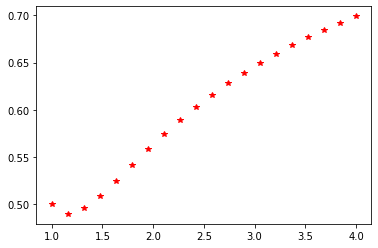

In [ ]:
r_vs_eps = np.zeros(20)
eps_list = np.linspace(1, 4, 20)
for j in range(0,len(eps_list)):
  psi_pt1 = psi_1s
  for i in range(2,100):
    bra = psi_nlm(mu, i, 0, 0, r, phi)
    matrix = bra_hp_ket(r, psi_1s, bra, eps_list[j])
    E_i = E_n(i)
    coeff = matrix/(E_i - E_1)
    psi_pt1 = psi_pt1 + coeff * bra
    p_of_r_2d_pt = psi_pt1 * psi_pt1 * r
    r_exp_2d = 0 
    for k in range(0,len(r)):
      if p_of_r_2d_pt[k] == p_of_r_2d_pt[k]:
        r_exp_2d = r_exp_2d + p_of_r_2d_pt[k] * r[k] * dr
  r_vs_eps[j] = np.real(r_exp_2d)
  print(eps_list[j], r_exp_2d)






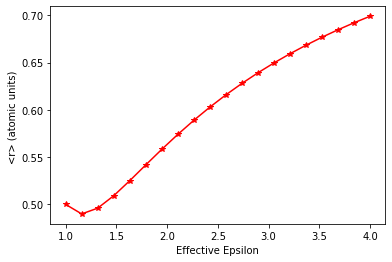

In [ ]:
plt.plot(eps_list, r_vs_eps, 'r*-', label="<r>")
plt.xlabel("Effective Epsilon")
plt.ylabel("<r> (atomic units) ")
plt.show()